In [1]:
import os

os.environ["BRASA_DATA_PATH"] = "/mnt/d/brasa"

In [2]:
import sys
sys.path.append('..')

from datetime import datetime

import numpy as np
import pandas as pd
import statsmodels.api as sm
import pyarrow.dataset as ds
import pyarrow.compute as pc
import pyarrow

import brasa

man = brasa.engine.CacheManager()

In [22]:
brasa.get_symbols("industry-sector")

['Bens Industriais',
 'Comunicações',
 'Consumo Cíclico',
 'Consumo não Cíclico',
 'Financeiro',
 'Materiais Básicos',
 'Outros',
 'Petróleo. Gás e Biocombustíveis',
 'Saúde',
 'Tecnologia da Informação',
 'Utilidade Pública']

In [ ]:
def map_b3_sector_to_gics_sector(sector:str) -> str:
    "https://en.wikipedia.org/wiki/Global_Industry_Classification_Standard"
    
    if sector == 'Bens Industriais':
        return 'industrials'
    elif sector == 'Comunicações':
        return 'communication services'
    elif sector == 'Consumo Cíclico':
        return "consumer discretionary"
    elif sector == 'Consumo não Cíclico':
        return "consumer staples"
    elif sector == 'Financeiro':
        return "financials"
    elif sector == 'Materiais Básicos':
        return "materials"
    elif sector == 'Petróleo. Gás e Biocombustíveis':
        return "energy"
    elif sector == 'Saúde':
        return 'health care'
    elif sector == 'Tecnologia da Informação':
        return 'information technology'
    elif sector == 'Utilidade Pública':
        return 'utilities'
    elif sector == 'Outros':
        return 'others'
    else:
        return sector

In [26]:
symbols = brasa.get_symbols("equity", index="IBXX")
symbols.append("IBOV")
symbols

['RRRP3',
 'ALOS3',
 'ALPA4',
 'ABEV3',
 'ARZZ3',
 'ASAI3',
 'AURE3',
 'AZUL4',
 'B3SA3',
 'BBSE3',
 'BBDC3',
 'BBDC4',
 'BRAP4',
 'BBAS3',
 'BRKM5',
 'BRFS3',
 'BPAC11',
 'CRFB3',
 'BHIA3',
 'CCRO3',
 'CMIG4',
 'CIEL3',
 'COGN3',
 'CSMG3',
 'CPLE6',
 'CSAN3',
 'CPFE3',
 'CMIN3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'DIRR3',
 'ECOR3',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENGI11',
 'ENEV3',
 'EGIE3',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'GGBR4',
 'GOAU4',
 'GMAT3',
 'NTCO3',
 'SOMA3',
 'HAPV3',
 'HYPE3',
 'IGTI11',
 'IRBR3',
 'ITSA4',
 'ITUB4',
 'JBSS3',
 'KLBN11',
 'RENT3',
 'LREN3',
 'LWSA3',
 'MDIA3',
 'MGLU3',
 'POMO4',
 'MRFG3',
 'BEEF3',
 'MOVI3',
 'MRVE3',
 'MULT3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'RECV3',
 'PRIO3',
 'PETZ3',
 'PSSA3',
 'RADL3',
 'RAIZ4',
 'RDOR3',
 'RAIL3',
 'SBSP3',
 'SANB11',
 'STBP3',
 'SMTO3',
 'CSNA3',
 'SLCE3',
 'SMFT3',
 'SUZB3',
 'TAEE11',
 'VIVT3',
 'TEND3',
 'TIMS3',
 'TOTS3',
 'TRPL4',
 'UGPA3',
 'USIM5',
 'VALE3',
 'VAMO3',
 'VBBR3',
 'VIVA3',
 'WEGE3',
 'YDUQ3',
 'IB

In [27]:
brasa.get_prices(symbols, start=datetime(2022, 1, 1)).dropna(axis=1)

,ABEV3,ALPA4,ARZZ3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,...,TRPL4,UGPA3,USIM5,VALE3,VAMO3,VBBR3,VIVA3,VIVT3,WEGE3,YDUQ3
2022-01-03,14.055559,34.223139,68.833730,12.536602,24.334430,9.961666,23.510156,13.400547,16.000992,16.675544,...,21.638680,13.136647,13.515537,63.309856,10.802703,18.852165,23.815169,43.049888,30.659325,19.601089
2022-01-04,14.037286,33.237513,66.810018,12.536602,24.314962,10.174846,23.533666,13.460850,16.103398,16.635523,...,21.664646,12.644023,13.407413,62.569131,10.326303,18.742823,22.795880,43.049888,30.509094,19.277671
2022-01-05,13.763559,31.961193,63.603137,11.818254,22.282231,9.961174,23.143008,13.372008,15.990674,16.434233,...,21.344009,12.310221,12.631123,63.157281,9.535309,17.920013,21.471439,42.998228,28.901265,18.533553
2022-01-06,13.544719,32.469375,64.760714,11.424707,22.968524,10.202235,23.330466,13.517763,16.217742,16.545986,...,21.245827,12.134185,12.648807,64.426742,10.002539,17.799949,21.724802,42.305957,28.892595,18.515019
2022-01-07,13.325294,32.281053,64.249105,11.198497,23.813766,10.443007,23.353796,13.573186,16.452899,16.028097,...,21.131100,12.050459,13.253420,68.176379,9.726469,17.764349,21.685698,42.018276,28.167390,18.437256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,12.410609,9.400381,60.651337,14.370850,14.058826,11.954465,55.420573,12.519032,13.960103,32.340625,...,25.381799,27.803529,10.149408,60.953625,8.550496,24.831365,25.081321,51.712646,39.680105,18.588993
2024-03-25,12.230655,9.240575,61.415544,14.530366,14.078509,11.855243,55.636713,12.470207,13.940559,31.952537,...,24.732025,27.811870,9.969764,60.825623,8.460716,25.149206,25.560374,50.244007,39.033319,18.657773
2024-03-26,12.410446,9.330208,62.164813,14.450449,13.999669,11.855243,55.931587,12.629826,14.139909,32.121886,...,24.910096,27.414160,9.929885,60.059220,8.640083,25.101423,24.681097,50.590691,38.775699,18.019677
2024-03-27,12.450159,9.430042,63.470275,14.879628,14.118666,12.018845,55.970739,12.809170,14.359078,32.709716,...,25.139269,28.132411,10.039113,60.605759,8.260784,25.359968,25.589361,50.393387,38.546922,17.630452


In [11]:
df = (
    brasa.get_dataset("brasa-prices")
    .filter(pc.field("symbol").isin(["USIM3", "PETR4"]))
    .to_table()
    .sort_by("refdate")
    .to_pandas()
)

<Axes: xlabel='refdate'>

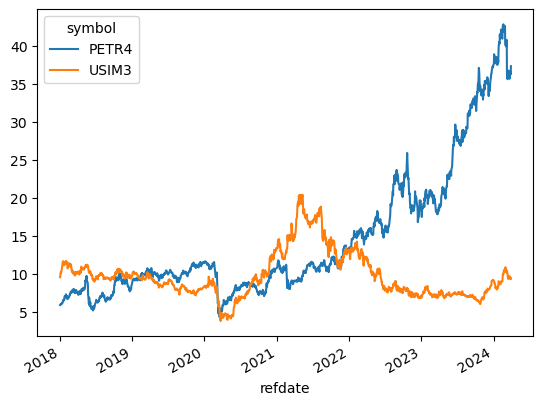

In [14]:
df.pivot_table(values=["open", "high", "low", "close"], index="refdate", columns="symbol")["close"].plot()

In [56]:
ds = brasa.get_dataset("brasa-returns")
ds.schema

refdate: timestamp[us]
symbol: string
returns: double
-- schema metadata --
pandas: '{"index_columns": [{"kind": "range", "name": null, "start": 0, "' + 615

In [57]:
import pyarrow.acero as ac

ac.Declaration.from_sequence([
    ac.Declaration('scan', ac.ScanNodeOptions(ds)),
    ac.Declaration('aggregate', ac.AggregateNodeOptions([], ['symbol'])),
]).to_table().to_pandas()

,symbol
0,USIM3
1,USIM5
2,VALE3
3,VERZ34
4,VGIR11
...,...
2415,AGFS
2416,IBSD
2417,IDVR
2418,DAPT252


In [72]:
ds_md = brasa.get_dataset("b3-bvbg086").filter(pc.field("refdate") == pc.field("creation_date"))
ds_md.schema

creation_date: timestamp[us]
refdate: timestamp[us]
symbol: string
security_id: int64
security_proprietary: int64
security_market: string
trade_quantity: double
volume: double
open_interest: double
traded_contracts: double
best_ask_price: double
best_bid_price: double
open: double
low: double
high: double
average: double
close: double
regular_transactions_quantity: double
regular_traded_contracts: double
regular_volume: double
nonregular_transactions_quantity: double
nonregular_traded_contracts: double
nonregular_volume: double
oscillation_percentage: double
adjusted_quote: double
adjusted_tax: double
previous_adjusted_quote: double
previous_adjusted_tax: double
variation_points: double
adjusted_value_contract: double
-- schema metadata --
pandas: '{"index_columns": [{"kind": "range", "name": null, "start": 0, "' + 4190

In [75]:
# ds_md.scanner(columns=["refdate"]).to_table()
t = ac.Declaration.from_sequence([
    ac.Declaration('scan', ac.ScanNodeOptions(ds_md)),
    ac.Declaration('filter', ac.FilterNodeOptions(pc.field("refdate") == pc.field("creation_date"))),
    ac.Declaration('aggregate', ac.AggregateNodeOptions([("refdate", "max", None, "max_refdate")])),
]).to_table()

In [76]:
t.to_pydict()["max_refdate"][0]

datetime.datetime(2024, 3, 28, 0, 0)

In [77]:
t.to_pylist()

[{'max_refdate': datetime.datetime(2024, 3, 28, 0, 0)}]

In [78]:
t.columns[0].to_numpy()[0]

numpy.datetime64('2024-03-28T00:00:00.000000')

In [79]:
(t.column("max_refdate"), t.columns[0])

(<pyarrow.lib.ChunkedArray object at 0x7fe84ed10450>
 [
   [
     2024-03-28 00:00:00.000000
   ]
 ],
 [
   [
     2024-03-28 00:00:00.000000
   ]
 ])

In [80]:
refdate = t.column("max_refdate")[0].as_py()

In [81]:
t = brasa.get_dataset("b3-bvbg086").filter(pc.field("refdate") == refdate).to_table()

In [82]:
t.shape

(34014, 30)

In [83]:
t.to_pandas()

,creation_date,refdate,symbol,security_id,security_proprietary,security_market,trade_quantity,volume,open_interest,traded_contracts,...,nonregular_transactions_quantity,nonregular_traded_contracts,nonregular_volume,oscillation_percentage,adjusted_quote,adjusted_tax,previous_adjusted_quote,previous_adjusted_tax,variation_points,adjusted_value_contract
0,2024-03-27,2024-03-28,BGIH24,100000205074,8,BVMF,1.0,76477.5,4156.0,1.0,...,NaN,NaN,NaN,-0.10,232.00,NaN,231.35,NaN,0.65,214.5
1,2024-03-27,2024-03-28,BGIK24,100000198186,8,BVMF,1.0,75900.0,7375.0,1.0,...,NaN,NaN,NaN,0.02,229.95,NaN,229.10,NaN,0.85,280.5
2,2024-03-27,2024-03-28,BGIQ24,200001236781,8,BVMF,3.0,10602867.0,263.0,135.0,...,NaN,NaN,NaN,0.25,237.40,NaN,236.90,NaN,0.50,165.0
3,2024-03-27,2024-03-28,BGIV24,100000205520,8,BVMF,2.0,161716.5,2670.0,2.0,...,NaN,NaN,NaN,-0.30,245.75,NaN,244.70,NaN,1.05,346.5
4,2024-03-27,2024-03-28,CCMK24,100000194857,8,BVMF,152.0,9240048.0,36324.0,344.0,...,NaN,NaN,NaN,0.06,59.66,NaN,59.92,NaN,-0.26,-117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34009,2024-03-28,2024-03-28,BBSEF315,200001413064,8,BVMF,NaN,NaN,2000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34010,2024-03-28,2024-03-28,VALES473,200001422805,8,BVMF,NaN,NaN,308600.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34011,2024-03-28,2024-03-28,BBASR487,200001343805,8,BVMF,NaN,NaN,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34012,2024-03-28,2024-03-28,BBASQ477,200001345153,8,BVMF,2.0,40.0,117300.0,800.0,...,NaN,NaN,NaN,-16.66,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
symbols = brasa.get_dataset("brasa-returns").filter(pc.field("refdate") == refdate).scanner(columns=["symbol"]).to_table()
symbols

pyarrow.Table
symbol: string
----
symbol: [["5GTK11","A1AP34","A1CR34","A1DM34","A1EE34",...,"Z1TS34","Z2SC34","ZAMP3","ZAVI11","ZIFI11"],["MLCX","IVBX","ICO2","AGFS","IBSD",...,"IBRA","TFIX","IBXL","IMOB","IBOV"],["DI1T126","DI1T1260","DI1T21","DI1T252","DI1T2520",...,"DI1T5040","DI1T63","DI1T756","DAPT252","DAPT504"]]

In [99]:
symbols.shape

(1314, 1)

In [130]:
quotes = brasa.get_dataset("b3-bvbg086").filter(pc.field("refdate") == refdate).filter(pc.field("symbol").isin(symbols.columns[0])).scanner(columns=["symbol", "close"]).to_table()
quotes.to_pandas()

,symbol,close
0,XRXB34,88.47
1,SHOT11,14.15
2,RBRF11,8.40
3,XPSF11,8.38
4,RBFF11,63.55
...,...,...
1268,Z2SC34,32.15
1269,JHSF3,4.88
1270,EQMA3B,29.45
1271,RNEW11,3.60


In [156]:
brasa.get_dataset("b3-bvbg087-indexes_info").schema

refdate: timestamp[us]
index_type: string
symbol: string
security_id: int64
security_proprietary: int64
security_market: string
asset_desc: string
settlement_price: double
open_price: double
min_price: double
max_price: double
average_price: double
close_price: double
last_price: double
oscillation_val: double
rising_shares_number: int64
falling_shares_number: int64
stable_shares_number: int64
-- schema metadata --
pandas: '{"index_columns": [{"kind": "range", "name": null, "start": 0, "' + 2528

In [157]:
brasa.get_dataset("b3-bvbg087-indexes_info").schema

refdate: timestamp[us]
index_type: string
symbol: string
security_id: int64
security_proprietary: int64
security_market: string
asset_desc: string
settlement_price: double
open_price: double
min_price: double
max_price: double
average_price: double
close_price: double
last_price: double
oscillation_val: double
rising_shares_number: int64
falling_shares_number: int64
stable_shares_number: int64
-- schema metadata --
pandas: '{"index_columns": [{"kind": "range", "name": null, "start": 0, "' + 2528

In [129]:
quotes_index = brasa.get_dataset("b3-bvbg087-indexes_info").filter(pc.field("refdate") == refdate).filter(pc.field("symbol").isin(symbols.columns[0])).scanner(columns=["symbol", "close_price"]).to_table()
quotes_index.to_pandas()

,symbol,close_price
0,MLCX,2558.54
1,IVBX,14257.24
2,ICO2,2378.69
3,AGFS,1735.52
4,IBSD,1547.09
5,IFIX,3408.15
6,ICON,2916.92
7,BDRX,16200.66
8,GPTW,1219.83
9,IDVR,1295.39


In [133]:
df_close = pd.concat([
    quotes_index.rename_columns(["symbol", "close"]).to_pandas(),
    quotes.to_pandas()
])
s_close = df_close.set_index("symbol")["close"]

In [112]:
set(symbols.column("symbol").to_pylist()) - (set(quotes.column("symbol").to_pylist()) | set(quotes_index.column("symbol").to_pylist()))

{'DAPT252',
 'DAPT504',
 'DI1T126',
 'DI1T1260',
 'DI1T21',
 'DI1T252',
 'DI1T2520',
 'DI1T3780',
 'DI1T504',
 'DI1T5040',
 'DI1T63',
 'DI1T756'}

In [134]:
rets = brasa.get_dataset("brasa-returns").filter(pc.field("symbol").isin(s_close.index)).to_table().to_pandas()

In [135]:
rets

,refdate,symbol,returns
0,2018-01-02,AALR3,0.005982
1,2018-01-02,AAPL34,-0.008940
2,2018-01-02,ABCB4,0.000000
3,2018-01-02,ABCP11,-0.000600
4,2018-01-02,ABEV3,0.019018
...,...,...,...
1177435,2022-04-12,SMLL,-0.001701
1177436,2022-04-12,IGNM,-0.005716
1177437,2022-04-13,ICON,-0.003908
1177438,2022-04-13,TFIX,0.000000


In [136]:
def _(df_eq, s_close):
    df_eq["refdate"] = df_eq["refdate"].astype(str)
    df_eq = df_eq.sort_values("refdate", ascending=False).reset_index()
    f = np.exp(df_eq["returns"])
    f = f.cumprod()
    f = f.shift()
    f.iloc[0] = 1
    df_eq["close"] = s_close[df_eq.loc[0, "symbol"]] / f

    return df_eq

adj_close = rets.groupby("symbol").apply(_, s_close).reset_index(drop=True)

<Axes: xlabel='refdate'>

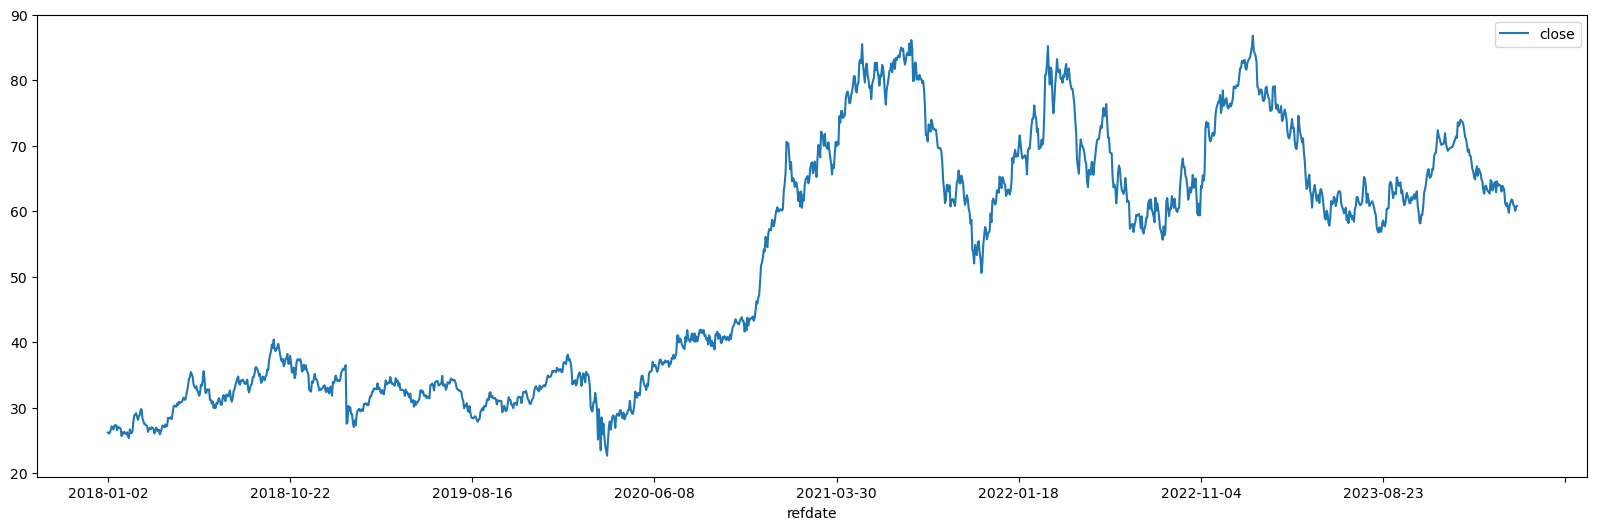

In [154]:
adj_close.query("symbol == 'VALE3'").sort_values("refdate").plot(x="refdate", y="close", figsize=(20, 6))

In [121]:
rets

,5GTK11,A1AP34,A1CR34,A1DM34,A1EE34,A1EP34,A1ES34,A1FL34,A1IV34,A1LB34,...,YDRO11,YDUQ3,YUFI11,YUMR34,Z1OM34,Z1TS34,Z2SC34,ZAMP3,ZAVI11,ZIFI11
2004-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,0.001499,-0.003305,NaN,-0.009444,NaN,NaN,NaN,NaN,0.047837,-0.036249,...,-0.002704,-0.009545,NaN,NaN,-0.012781,0.000000,-0.013693,-0.013998,-0.004008,-0.036768
2024-03-25,-0.008133,-0.017960,0.004291,0.005982,NaN,NaN,NaN,NaN,-0.004912,-0.022859,...,-0.003305,0.003693,NaN,NaN,0.007571,0.032854,-0.002102,0.005584,-0.003305,0.012423
2024-03-26,-0.004410,-0.003406,0.004291,-0.010960,NaN,NaN,0.096219,NaN,-0.001201,0.012916,...,0.006380,-0.034799,NaN,NaN,0.001499,-0.055936,NaN,-0.034281,-0.012781,0.024302
2024-03-27,0.006976,0.010148,NaN,0.018920,NaN,NaN,0.000000,NaN,0.006181,0.062975,...,0.023228,-0.021837,NaN,NaN,-0.006723,0.014396,NaN,-0.008738,0.000600,NaN


In [266]:
brasa.get_dataset("b3-equities-adjusted-prices").to_table().to_pandas()

,refdate,symbol,open,high,low,close
0,2024-03-28,5GTK11,91.900000,92.150000,91.650000,92.150000
1,2024-03-27,5GTK11,90.796745,91.436793,90.796745,91.436793
2,2024-03-26,5GTK11,91.211235,91.621286,90.801185,90.801185
3,2024-03-25,5GTK11,91.952496,91.952496,91.072472,91.202476
4,2024-03-22,5GTK11,91.807253,92.237240,91.757254,91.947248
...,...,...,...,...,...,...
1128445,2024-02-09,BEWL39,46.041168,46.041168,45.931189,45.931189
1128446,2024-02-02,BEWL39,46.969855,46.969855,46.839883,46.839883
1128447,2024-02-01,BEWL39,47.089457,47.089457,47.089457,47.089457
1128448,2024-01-31,BEWL39,47.182392,47.182392,47.042415,47.042415


In [267]:
brasa.get_dataset("b3-indexes-adjusted-prices").to_table().to_pandas()

,refdate,symbol,open,high,low,close
0,2024-03-28,AGFS,1721.790000,1742.970000,1716.870000,1735.520000
1,2024-03-27,AGFS,1708.615877,1724.487046,1706.085691,1721.916857
2,2024-03-26,AGFS,1712.520002,1716.270594,1705.468891,1708.759409
3,2024-03-25,AGFS,1716.454111,1722.934617,1710.263627,1712.183777
4,2024-03-22,AGFS,1745.413971,1745.413971,1710.702699,1716.302904
...,...,...,...,...,...,...
48985,2016-05-12,UTIL,3063.618184,3142.531814,3060.625432,3125.515588
48986,2016-05-11,UTIL,3058.029835,3113.052048,3058.029835,3063.368264
48987,2016-05-10,UTIL,2993.715778,3057.999352,2993.715778,3057.271385
48988,2016-05-09,UTIL,3013.083213,3014.670584,2959.486688,2991.274554


In [275]:
brasa.get_dataset("brasa-prices").filter(pc.field("symbol") == "BOVA11").to_table().to_pandas()

,refdate,symbol,open,high,low,close
0,2024-03-28,BOVA11,123.820000,124.660000,123.570000,124.330000
1,2024-03-27,BOVA11,123.007015,124.077076,122.526987,124.057074
2,2024-03-26,BOVA11,123.015880,123.525946,122.915867,123.255911
3,2024-03-25,BOVA11,123.306642,123.516670,123.046607,123.206628
4,2024-03-22,BOVA11,124.109015,124.239024,123.188948,123.218950
...,...,...,...,...,...,...
3786,2008-12-09,BOVA11,NaN,NaN,NaN,37.645020
3787,2008-12-08,BOVA11,NaN,NaN,NaN,38.567594
3788,2008-12-05,BOVA11,NaN,NaN,NaN,35.448893
3789,2008-12-04,BOVA11,NaN,NaN,NaN,35.799873


In [231]:
ds_md = brasa.get_dataset("b3-bvbg086")
seq = [
    ac.Declaration("scan", ac.ScanNodeOptions(ds_md)),
    ac.Declaration("filter", ac.FilterNodeOptions(pc.field("refdate") == pc.field("creation_date"))),
    ac.Declaration("aggregate", ac.AggregateNodeOptions([("refdate", "max", None, "max_refdate")])),
]
t = ac.Declaration.from_sequence(seq).to_table()
refdate = t.column("max_refdate")[0].as_py()
symbols = (
    brasa.get_dataset("brasa-returns")
    .filter(pc.field("refdate") == refdate)
    .scanner(columns=["symbol"])
    .to_table()
)
ohlc = (
    brasa.get_dataset("b3-bvbg086")
    .filter(pc.field("symbol").isin(symbols.columns[0].to_pylist()))
    .scanner(columns=["symbol", "refdate", "close", "open", "high", "low"])
    .to_table()
    .to_pandas()
)
rets = brasa.get_dataset("brasa-returns").filter(pc.field("symbol").isin(ohlc["symbol"].unique())).to_table().to_pandas()

all_data = rets.set_index(["refdate", "symbol"]).join(ohlc.set_index(["refdate", "symbol"])).reset_index()

def _(all_data):
    all_data = all_data.set_index("refdate").sort_index(ascending=False)
    rets = all_data["returns"]
    f = np.exp(rets).cumprod().shift()
    f.iloc[0] = 1
    close = all_data["close"].iloc[0].item()
    adj_close = close / f
    fc = adj_close / all_data["close"]
    adj_open = all_data["open"] * fc
    adj_high = all_data["high"] * fc
    adj_low = all_data["low"] * fc
    adj = pd.concat([adj_open, adj_high, adj_low, adj_close], axis=1)
    adj.columns = ["open", "high", "low", "close"]

    return adj.reset_index()

all_data.groupby("symbol").apply(_).reset_index()[["refdate", "symbol", "open", "high", "low", "close"]]

In [265]:
ohlc.set_index(["refdate", "symbol"]).index.get_level_values("symbol").unique()

Index(['FPAB11', 'IVVB11', 'OSXB3', 'CGRA4', 'CGRA3', 'BRKM5', 'BRKM3',
       'CSMG3', 'EMAE4', 'FRTA3',
       ...
       'CPOF11', 'KOPA11', 'AZIN11', 'PMIS11', 'GZIT11', 'GARE11', 'AAGR11',
       'ICRI11', 'IBIT39', 'C1RH34'],
      dtype='object', name='symbol', length=1273)

In [229]:
symbol = "MGLU3"
_rets = rets.query("symbol == @symbol").set_index("refdate").sort_index(ascending=False)["returns"]
f = np.exp(_rets).cumprod().shift()
f.iloc[0] = 1
refdate = f.index[0]
close = ohlc.query("symbol == @symbol & refdate == @refdate")["close"].item()
adj_close = close / f
_ohlc = ohlc.query("symbol == @symbol").set_index("refdate").drop(columns=["symbol"])
adj_open = adj_close * _ohlc["open"] / _ohlc["close"]
adj_high = adj_close * _ohlc["high"] / _ohlc["close"]
adj_low = adj_close * _ohlc["low"] / _ohlc["close"]
adj = pd.concat([adj_open, adj_high, adj_low, adj_close], axis=1)
adj.columns = ["open", "high", "low", "close"]

,open,high,low,close
refdate,,,,
2018-01-02,2.455673,2.500597,2.380090,2.407106
2018-01-03,2.398025,2.469662,2.353100,2.376776
2018-01-04,2.428355,2.444139,2.407107,2.433819
2018-01-05,2.442029,2.455992,2.378284,2.385873
2018-01-08,2.382772,2.431642,2.378219,2.386111
...,...,...,...,...
2024-03-22,1.959813,1.969812,1.809827,1.919817
2024-03-25,1.919833,1.939831,1.849839,1.909834
2024-03-26,1.899963,1.909962,1.779965,1.779965


In [164]:
ds_md = brasa.get_dataset("b3-bvbg087-indexes_info")
seq = [
    ac.Declaration("scan", ac.ScanNodeOptions(ds_md)),
    ac.Declaration("aggregate", ac.AggregateNodeOptions([("refdate", "max", None, "max_refdate")])),
]
t = ac.Declaration.from_sequence(seq).to_table()
refdate = t.column("max_refdate")[0].as_py()
symbols = (
    brasa.get_dataset("brasa-returns")
    .filter(pc.field("refdate") == refdate)
    .scanner(columns=["symbol"])
    .to_table()
)
close = (
    brasa.get_dataset("b3-bvbg087-indexes_info")
    .filter(pc.field("refdate") == refdate)
    .filter(pc.field("symbol").isin(symbols.columns[0].to_pylist()))
    .scanner(columns=["symbol", "close_price"])
    .to_table()
)
close = close.to_pandas().set_index("symbol")["close_price"]
rets = brasa.get_dataset("brasa-returns").filter(pc.field("symbol").isin(close.index)).to_table().to_pandas()

def _(rets, close):
    rets["refdate"] = rets["refdate"].astype(str)
    rets = rets.sort_values("refdate", ascending=False).reset_index()
    f = np.exp(rets["returns"])
    f = f.cumprod()
    f = f.shift()
    f.iloc[0] = 1
    rets["close"] = close[rets.loc[0, "symbol"]] / f

    return rets[["refdate", "close"]]

rets.groupby("symbol").apply(_, close).reset_index()[["refdate", "symbol", "close"]]

,refdate,symbol,close
0,2024-03-28,AGFS,1735.520000
1,2024-03-27,AGFS,1721.916857
2,2024-03-26,AGFS,1708.759409
3,2024-03-25,AGFS,1712.183777
4,2024-03-22,AGFS,1716.302904
...,...,...,...
48985,2016-05-12,UTIL,3125.515588
48986,2016-05-11,UTIL,3063.368264
48987,2016-05-10,UTIL,3057.271385
48988,2016-05-09,UTIL,2991.274554
